In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, log_loss, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_applic.csv')
df.head()



,Application Number,Application: Buy Rate,Application: Funded Amount,Application: BPA Broker Negotiation,Application: Origination Fee,Application: Remittance Frequency,Primary Contact Gender,Application: Close Date,customer Age,Amount,...,Satisfactory,Shipping State,Sum of Monthly Personal Debt,Time In Business Actual,Type,Volume - 4 Months Ago,Volume - 6 Months Ago,Volume - Three Months Ago,Yearly Total Sales,Outcome
0,APP-299936,1.25,9000.0,0,2.0,Daily,NaN,1/3/2017,35.0,9000.0,...,40.0,NJ,4792.0,24.0,New Deal,0.00,0,11605.73,128688.72,Neg
1,APP-299718,1.25,9500.0,0,2.0,Daily,Male,1/3/2017,47.0,9500.0,...,24.0,OH,2867.0,17.7,New Deal,35205.42,29288.31,30209.32,351830.88,Neg
2,APP-299671,1.25,6000.0,0,2.0,Daily,Male,1/3/2017,58.0,6000.0,...,15.0,NY,1331.0,17.5,New Deal,6299.58,4799.65,9281.73,132113.4,Neg
3,APP-299367,1.25,15000.0,0,2.0,Daily,Male,1/3/2017,62.0,15000.0,...,8.0,MN,16491.0,5.1,New Deal,0.00,0,44114.52,448156.8,Pos
4,APP-299364,1.25,14000.0,0,2.0,Daily,Female,1/3/2017,64.0,14000.0,...,22.0,PA,1373.0,1.5,New Deal,0.00,0,16168.17,205465.32,Pos


In [3]:
df_subset = df.iloc[:, 30:]

df_subset

,Months,Number of Trade Lines,Office Space,Open Bankruptcy,Position,Public Records,Sales to Payment,Satisfactory,Shipping State,Sum of Monthly Personal Debt,Time In Business Actual,Type,Volume - 4 Months Ago,Volume - 6 Months Ago,Volume - Three Months Ago,Yearly Total Sales,Outcome
0,6.43,40.0,Rent,0.0,First,0.0,18.00,40.0,NJ,4792.0,24.0,New Deal,0.00,0,11605.73,128688.72,Neg
1,6.29,25.0,Rent,0.0,Second,0.0,18.00,24.0,OH,2867.0,17.7,New Deal,35205.42,29288.31,30209.32,351830.88,Neg
2,6.29,20.0,Rent,0.0,Second,0.0,6.50,15.0,NY,1331.0,17.5,New Deal,6299.58,4799.65,9281.73,132113.4,Neg
3,6.29,24.0,Own,0.0,First,3.0,0.00,8.0,MN,16491.0,5.1,New Deal,0.00,0,44114.52,448156.8,Pos
4,6.29,24.0,Rent,0.0,First,0.0,0.00,22.0,PA,1373.0,1.5,New Deal,0.00,0,16168.17,205465.32,Pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,8.38,29.0,Rent,0.0,First,0.0,0.00,28.0,TX,2400.0,19.8,Paid Renewal,NaN,NaN,152267.44,4913317.56,Pos
9791,12.00,16.0,Own,0.0,First,0.0,0.00,15.0,LA,7184.0,28.0,Potential Dupe,NaN,NaN,1034011.52,10866517.08,Pos
9792,6.29,15.0,Rent,0.0,First,0.0,0.00,15.0,PA,1865.0,5.6,Paid Renewal,NaN,NaN,NaN,507148.68,Pos
9793,7.33,17.0,Rent,1.0,First,1.0,0.00,13.0,CA,5138.0,18.6,New Deal,207219.75,NaN,134922.09,2118071.88,Pos


In [4]:
columns_to_keep = [
    'Application: Buy Rate',
    'Application: Funded Amount',
    'Application: BPA Broker Negotiation',
    'Application: Origination Fee',
    'customer Age',
    'Amount',
    'Satisfactory',
    'Time In Business Actual',
    'Sum of Monthly Personal Debt',
    'Yearly Total Sales',
    'Outcome',
    'crime_record',
    'Volume - 4 Months Ago',
    'Volume - 6 Months Ago',
    'Volume - Three Months Ago',
    'Average Daily Negatives',
    'Average Monthly Sales',
    'Avg Daily Bank Balance',
    'Avg Number of Monthly Deposits',
    'Brokers submitted All Time',
    'Brokers submitted last 1 month',
    'Brokers submitted last 3 months',
    'Brokers submitted last 6 months',
    'Credit Score',
    'Daily Bank Balance v/s Daily Payment',
    'Days',
    'Factor Rate',
    'Inquiry Count',
    'Months',
    'Number of Trade Lines',
    'Open Bankruptcy',
    'Public Records',
    'Sales to Payment',
    'Satisfactory',
    'Sum of Monthly Personal Debt',
    'Time In Business Actual'
]

df = df[columns_to_keep]

df.head()
#type
#crime record

,Application: Buy Rate,Application: Funded Amount,Application: BPA Broker Negotiation,Application: Origination Fee,customer Age,Amount,Satisfactory,Time In Business Actual,Sum of Monthly Personal Debt,Yearly Total Sales,...,Factor Rate,Inquiry Count,Months,Number of Trade Lines,Open Bankruptcy,Public Records,Sales to Payment,Satisfactory,Sum of Monthly Personal Debt,Time In Business Actual
0,1.25,9000.0,0,2.0,35.0,9000.0,40.0,24.0,4792.0,128688.72,...,1.37,24.0,6.43,40.0,0.0,0.0,18.0,40.0,4792.0,24.0
1,1.25,9500.0,0,2.0,47.0,9500.0,24.0,17.7,2867.0,351830.88,...,1.35,18.0,6.29,25.0,0.0,0.0,18.0,24.0,2867.0,17.7
2,1.25,6000.0,0,2.0,58.0,6000.0,15.0,17.5,1331.0,132113.4,...,1.31,51.0,6.29,20.0,0.0,0.0,6.5,15.0,1331.0,17.5
3,1.25,15000.0,0,2.0,62.0,15000.0,8.0,5.1,16491.0,448156.8,...,1.35,1.0,6.29,24.0,0.0,3.0,0.0,8.0,16491.0,5.1
4,1.25,14000.0,0,2.0,64.0,14000.0,22.0,1.5,1373.0,205465.32,...,1.37,13.0,6.29,24.0,0.0,0.0,0.0,22.0,1373.0,1.5


In [5]:
crime_records_set = set(df["crime_record"].tolist())


In [6]:
crime_records_set

{'drug', 'fraud', nan, 'traffic'}

In [10]:
outcome_column_index = df.columns.get_loc("Outcome")
crime_records_index = df.columns.get_loc("crime_record")


df.iloc[:, outcome_column_index] = df.iloc[:, outcome_column_index].replace({'Neg': 0.0, 'Pos': 1.0})

crime_record_mapping = {'drug': 2, 'fraud': 3, 'traffic': 1}
default_value = 0

df['crime_record'].replace(crime_record_mapping, inplace=True)
df['crime_record'].fillna(default_value, inplace=True)

mask = df.applymap(lambda x: isinstance(x, str)).all(axis=1)
df = df[~mask]

df.dropna(inplace=True)

df = df.astype(float)


In [11]:
df
#9191

,Application: Buy Rate,Application: Funded Amount,Application: BPA Broker Negotiation,Application: Origination Fee,customer Age,Amount,Satisfactory,Time In Business Actual,Sum of Monthly Personal Debt,Yearly Total Sales,...,Factor Rate,Inquiry Count,Months,Number of Trade Lines,Open Bankruptcy,Public Records,Sales to Payment,Satisfactory,Sum of Monthly Personal Debt,Time In Business Actual
0,1.250,9000.0,0.0,2.0,35.0,9000.0,40.0,24.0,4792.0,128688.72,...,1.370,24.0,6.43,40.0,0.0,0.0,18.00,40.0,4792.0,24.0
1,1.250,9500.0,0.0,2.0,47.0,9500.0,24.0,17.7,2867.0,351830.88,...,1.350,18.0,6.29,25.0,0.0,0.0,18.00,24.0,2867.0,17.7
2,1.250,6000.0,0.0,2.0,58.0,6000.0,15.0,17.5,1331.0,132113.40,...,1.310,51.0,6.29,20.0,0.0,0.0,6.50,15.0,1331.0,17.5
3,1.250,15000.0,0.0,2.0,62.0,15000.0,8.0,5.1,16491.0,448156.80,...,1.350,1.0,6.29,24.0,0.0,3.0,0.00,8.0,16491.0,5.1
4,1.250,14000.0,0.0,2.0,64.0,14000.0,22.0,1.5,1373.0,205465.32,...,1.370,13.0,6.29,24.0,0.0,0.0,0.00,22.0,1373.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,1.300,20000.0,0.0,3.0,53.0,20000.0,21.0,6.8,1966.0,504123.12,...,1.400,15.0,6.81,21.0,0.0,0.0,8.02,21.0,1966.0,6.8
9779,1.375,10000.0,0.0,3.0,57.0,10000.0,25.0,3.4,9034.0,256078.32,...,1.425,1.0,6.29,34.0,0.0,0.0,0.00,25.0,9034.0,3.4
9783,1.375,13500.0,0.0,3.0,33.0,13500.0,6.0,4.2,722.0,609484.44,...,1.495,25.0,6.29,7.0,0.0,0.0,11.70,6.0,722.0,4.2
9784,1.300,11000.0,0.0,3.0,38.0,11000.0,28.0,11.6,3949.0,419579.76,...,1.380,8.0,11.95,28.0,0.0,0.0,12.16,28.0,3949.0,11.6


In [12]:
set(df["crime_record"].tolist())

{0.0, 1.0, 2.0, 3.0}

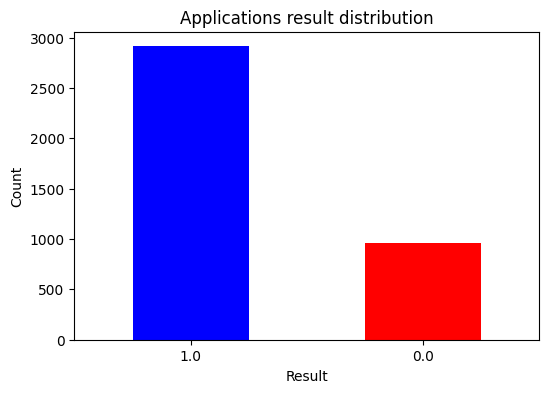

Class Distribution:
1.0    2912
0.0     956
Name: Outcome, dtype: int64


In [13]:
class_distribution = df['Outcome'].value_counts()

plt.figure(figsize=(6, 4))

class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Applications result distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Class Distribution:")
print(class_distribution)

In [14]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [15]:
X.head(50)

,Application: Buy Rate,Application: Funded Amount,Application: BPA Broker Negotiation,Application: Origination Fee,customer Age,Amount,Satisfactory,Time In Business Actual,Sum of Monthly Personal Debt,Yearly Total Sales,...,Factor Rate,Inquiry Count,Months,Number of Trade Lines,Open Bankruptcy,Public Records,Sales to Payment,Satisfactory,Sum of Monthly Personal Debt,Time In Business Actual
0,1.250,9000.0,0.0,2.0,35.0,9000.0,40.0,24.0,4792.0,128688.72,...,1.370,24.0,6.43,40.0,0.0,0.0,18.00,40.0,4792.0,24.0
1,1.250,9500.0,0.0,2.0,47.0,9500.0,24.0,17.7,2867.0,351830.88,...,1.350,18.0,6.29,25.0,0.0,0.0,18.00,24.0,2867.0,17.7
2,1.250,6000.0,0.0,2.0,58.0,6000.0,15.0,17.5,1331.0,132113.40,...,1.310,51.0,6.29,20.0,0.0,0.0,6.50,15.0,1331.0,17.5
3,1.250,15000.0,0.0,2.0,62.0,15000.0,8.0,5.1,16491.0,448156.80,...,1.350,1.0,6.29,24.0,0.0,3.0,0.00,8.0,16491.0,5.1
4,1.250,14000.0,0.0,2.0,64.0,14000.0,22.0,1.5,1373.0,205465.32,...,1.370,13.0,6.29,24.0,0.0,0.0,0.00,22.0,1373.0,1.5
5,1.250,20000.0,0.0,2.0,65.0,20000.0,22.0,8.5,4208.0,933843.96,...,1.350,28.0,6.29,23.0,0.0,0.0,1.87,22.0,4208.0,8.5
6,1.250,9000.0,0.0,2.5,54.0,9000.0,11.0,1.4,2955.0,223844.04,...,1.380,8.0,6.29,21.0,0.0,0.0,10.60,11.0,2955.0,1.4
7,1.250,30000.0,0.0,2.0,55.0,30000.0,27.0,15.9,5328.0,690175.92,...,1.290,12.0,6.29,29.0,0.0,1.0,10.75,27.0,5328.0,15.9
9,1.240,8000.0,0.0,2.0,42.0,8000.0,8.0,7.7,3716.0,420007.92,...,1.360,7.0,5.24,12.0,0.0,0.0,12.26,8.0,3716.0,7.7
10,1.240,111000.0,0.0,2.0,47.0,111000.0,26.0,5.0,5850.0,2009100.00,...,1.380,28.0,7.33,27.0,0.0,0.0,12.50,26.0,5850.0,5.0


In [16]:
models = []

X_train = X_train.replace(',', '', regex=True).astype(float)
X_test = X_test.replace(',', '', regex=True).astype(float)

for i in range(0):
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    models.append(model)


In [17]:
from sklearn.ensemble import AdaBoostClassifier

X_train = X_train.replace(',', '', regex=True).astype(float)
X_test = X_test.replace(',', '', regex=True).astype(float)

for i in range(10):
    
    model = AdaBoostClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    models.append(model)


In [18]:
voting_clf = VotingClassifier(estimators=[
    ('0', models[0]),
    ('1', models[1]),
    ('2', models[2]),
    ('3', models[3]),
    ('4', models[4]),
    ('5', models[5]),
    ('6', models[6]),
    ('7', models[7]),
    ('8', models[8]),
    ('9', models[9]),
], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
score = voting_clf.score(X_test, y_test)

In [20]:
print("VotingClassifier accuracy:", accuracy)
print("VotingClassifier Score:", score) 
print("VotingClassifier Confusion Matrix:")
print(conf_matrix)
print("VotingClassifier Classification Report:")
print(classification_report)

VotingClassifier accuracy: 0.7545219638242894
VotingClassifier Score: 0.7545219638242894
VotingClassifier Confusion Matrix:
[[  79  297]
 [  83 1089]]
VotingClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.21      0.29       376
         1.0       0.79      0.93      0.85      1172

    accuracy                           0.75      1548
   macro avg       0.64      0.57      0.57      1548
weighted avg       0.71      0.75      0.72      1548



### 3 - 7 

<!-- VotingClassifier accuracy: 0.7545219638242894
VotingClassifier Score: 0.7545219638242894
VotingClassifier Confusion Matrix:
[[  79  297]
 [  83 1089]]
VotingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.21      0.29       376
           1       0.79      0.93      0.85      1172

    accuracy                           0.75      1548
   macro avg       0.64      0.57      0.57      1548
weighted avg       0.71      0.75      0.72      1548 -->


In [24]:
!pip install tensorflow
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [25]:
def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    ce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False)
    pt = tf.exp(-ce_loss)
    focal_loss = alpha * ((1 - pt) ** gamma) * ce_loss
    return focal_loss

In [26]:
df = df.astype(float)

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train = X_train.replace(',', '', regex=True).astype(float)
X_test = X_test.replace(',', '', regex=True).astype(float)

In [32]:
# Simple Perceptrone
model = keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])



history_focal = model.fit(X_train, y_train, epochs=100, batch_size=75, validation_data=(X_test, y_test))

y_pred_focal = model.predict(X_test)
focal_loss_value = model.evaluate(X_test, y_test)
focal_conf_matrix = confusion_matrix(y_test, y_pred_focal.round())


Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 3086.7998 - accuracy: 0.5487 - val_loss: 2224.3308 - val_accuracy: 0.6751
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 2089.6338 - accuracy: 0.6897 - val_loss: 2244.0801 - val_accuracy: 0.6893
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 1993.0394 - accuracy: 0.6703 - val_loss: 2131.7939 - val_accuracy: 0.6815
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 1926.6410 - accuracy: 0.6720 - val_loss: 2023.8500 - val_accuracy: 0.6764
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 1842.8750 - accuracy: 0.6767 - val_loss: 2006.2736 - val_accuracy: 0.6867
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 1748.2599 - accuracy: 0.6603 - val_loss: 1891.5061 - val_accuracy: 0.6764
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 1654.7690 - accuracy: 0.6711 - val_loss: 1837

31/31 [==============================] - 0s 4ms/step - loss: 38.1085 - accuracy: 0.6634 - val_loss: 89.1371 - val_accuracy: 0.7558
Epoch 58/100
31/31 [==============================] - 0s 4ms/step - loss: 21.7095 - accuracy: 0.6082 - val_loss: 20.9665 - val_accuracy: 0.7552
Epoch 59/100
31/31 [==============================] - 0s 4ms/step - loss: 14.8458 - accuracy: 0.6345 - val_loss: 10.9247 - val_accuracy: 0.7009
Epoch 60/100
31/31 [==============================] - 0s 4ms/step - loss: 24.0813 - accuracy: 0.6151 - val_loss: 19.9927 - val_accuracy: 0.7481
Epoch 61/100
31/31 [==============================] - 0s 3ms/step - loss: 18.7105 - accuracy: 0.6349 - val_loss: 21.8386 - val_accuracy: 0.7545
Epoch 62/100
31/31 [==============================] - 0s 2ms/step - loss: 42.3950 - accuracy: 0.6573 - val_loss: 60.8255 - val_accuracy: 0.7558
Epoch 63/100
31/31 [==============================] - 0s 3ms/step - loss: 51.5598 - accuracy: 0.6228 - val_loss: 30.7625 - val_accuracy: 0.7468
Epoch

In [33]:
print("\n\n\nFocal Loss and Accuracy:")
print(focal_loss_value)
print(classification_report(y_test, (y_pred_focal > 0.5).astype(int)))
print("\nFocal Confusion Matrix:")
# TP  FP
# FN  TN
print(focal_conf_matrix)




Focal Loss and Accuracy:
[14.641741752624512, 0.6692506670951843]
              precision    recall  f1-score   support

         0.0       0.27      0.21      0.24       376
         1.0       0.76      0.82      0.79      1172

    accuracy                           0.67      1548
   macro avg       0.52      0.51      0.51      1548
weighted avg       0.64      0.67      0.66      1548


Focal Confusion Matrix:
[[ 80 296]
 [216 956]]


In [ ]:
model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])



history_focal = model.fit(X_train, y_train, epochs=50, batch_size=75, validation_data=(X_test, y_test))

y_pred_focal = model.predict(X_test)
focal_loss_value = model.evaluate(X_test, y_test)
focal_conf_matrix = confusion_matrix(y_test, y_pred_focal.round())

Epoch 1/50
31/31 [==============================] - 1s 9ms/step - loss: 767.8924 - accuracy: 0.6345 - val_loss: 147.8159 - val_accuracy: 0.7196
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 272.4625 - accuracy: 0.5823 - val_loss: 304.3968 - val_accuracy: 0.7565
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 143.7011 - accuracy: 0.6241 - val_loss: 171.1481 - val_accuracy: 0.3643
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 176.8451 - accuracy: 0.6293 - val_loss: 456.4684 - val_accuracy: 0.7565
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 168.7949 - accuracy: 0.6431 - val_loss: 196.0590 - val_accuracy: 0.7565
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 177.0711 - accuracy: 0.6328 - val_loss: 525.9317 - val_accuracy: 0.7571
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 188.8081 - accuracy: 0.6263 - val_loss: 80.8503 - val_accuracy: 

In [37]:
print("\n\n\nFocal Loss and Accuracy:")
print(focal_loss_value)
print(classification_report(y_test, (y_pred_focal > 0.5).astype(int)))
print("\nFocal Confusion Matrix:")
# TP  FP
# FN  TN
print(focal_conf_matrix)




Focal Loss and Accuracy:
[116.5549087524414, 0.4844961166381836]
              precision    recall  f1-score   support

         0.0       0.26      0.62      0.37       376
         1.0       0.78      0.44      0.56      1172

    accuracy                           0.48      1548
   macro avg       0.52      0.53      0.47      1548
weighted avg       0.66      0.48      0.52      1548


Focal Confusion Matrix:
[[234 142]
 [656 516]]
